In [3]:
import pandas as pd
!python --version
!py -m pip install matplotlib as plt


Python 3.11.9


ERROR: Could not find a version that satisfies the requirement as (from versions: none)
ERROR: No matching distribution found for as

[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: C:\Users\Paolo Canigiula\AppData\Local\Programs\Python\Python312\python.exe -m pip install --upgrade pip


In [ ]:
news_df = pd.read_csv("all_data.csv", encoding='latin1')
news_df.columns = ['Sentiment', 'Headline']

print(news_df)
#print(news_df['Sentiment'].unique())
sentiment_count = news_df['Sentiment'].value_counts()

print(sentiment_count)



     Sentiment                                           Headline
0      neutral  Technopolis plans to develop in stages an area...
1     negative  The international electronic industry company ...
2     positive  With the new production plant the company woul...
3     positive  According to the company 's updated strategy f...
4     positive  FINANCING OF ASPOCOMP 'S GROWTH Aspocomp is ag...
...        ...                                                ...
4840  negative  LONDON MarketWatch -- Share prices ended lower...
4841   neutral  Rinkuskiai 's beer sales fell by 6.5 per cent ...
4842  negative  Operating profit fell to EUR 35.4 mn from EUR ...
4843  negative  Net sales of the Paper segment decreased to EU...
4844  negative  Sales in Finland decreased by 10.5 % in Januar...

[4845 rows x 2 columns]
Sentiment
neutral     2878
positive    1363
negative     604
Name: count, dtype: int64


<Axes: title={'center': 'Sentiment Distribution'}, xlabel='Sentiment', ylabel='Number of Headlines'>

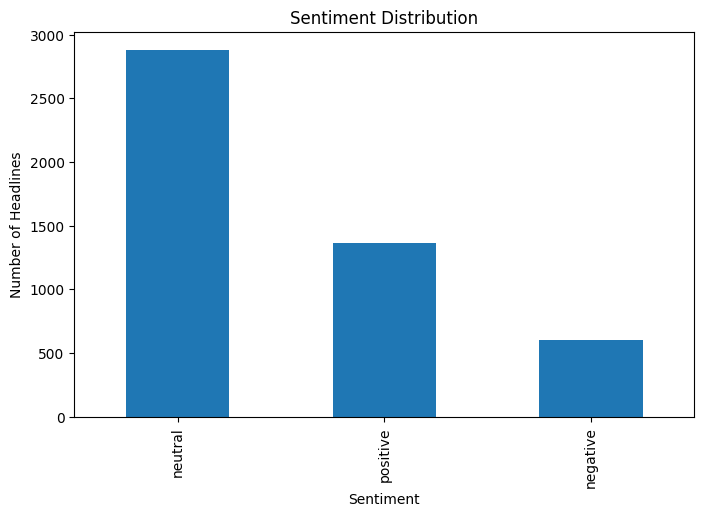

In [5]:
sentiment_counts = news_df['Sentiment'].value_counts()
sentiment_counts.plot(kind='bar', figsize=(8, 5), title=('Sentiment Distribution'),xlabel=('Sentiment'),ylabel=('Number of Headlines'))

In [6]:
!pip install wordcloud

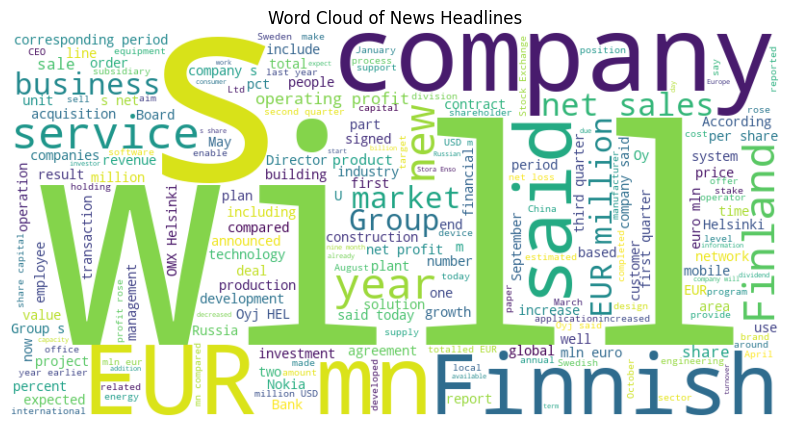

In [ ]:
from wordcloud import WordCloud
import pandas as pd
import matplotlib.pyplot as plt
import string

news_df = pd.read_csv("all_data.csv", encoding='latin1')
news_df.columns = ['Sentiment', 'Headline']

translator = str.maketrans('', '', string.punctuation)

all_headlines = ' '.join(news_df['Headline'])

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_headlines)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud of News Headlines")
plt.show()


In [62]:
newsapi_df = pd.read_csv('./news_api_download/articles-complete.csv.crdownload')
print(newsapi_df.columns)

newsapi_df['polarity'] = pd.to_numeric(newsapi_df['polarity'], errors='coerce')
newsapi_df['subjectivity'] = pd.to_numeric(newsapi_df['subjectivity'], errors='coerce')
filtered_sources = newsapi_df.groupby('source_name').filter(lambda x: len(x) > 10)
grouped_df = filtered_sources.groupby('source_name')[['polarity', 'subjectivity']].mean().reset_index()
grouped_df = grouped_df[grouped_df['source_name'] != 'Middle']

top_5_polarity = grouped_df.nlargest(5, 'polarity')
bottom_5_polarity = grouped_df.nsmallest(5, 'polarity')

top_5_subjectivity = grouped_df.nlargest(5, 'subjectivity')
bottom_5_subjectivity = grouped_df.nsmallest(5, 'subjectivity')

closest_to_zero_polarity = grouped_df.iloc[(grouped_df['polarity'].abs().argsort()[:5])]

print("\nSources Closest to Neutral Polarity (Closest to 0):")
print(closest_to_zero_polarity)
print("\nTop 5 Sources by Polarity:")
print(top_5_polarity)
print("\nBottom 5 Sources by Polarity:")
print(bottom_5_polarity)
print("\nTop 5 Sources by Subjectivity:")
print(top_5_subjectivity)
print("\nBottom 5 Sources by Subjectivity:")
print(bottom_5_subjectivity)


Index(['author', 'title', 'description', 'url', 'urlToImage', 'publishedAt',
       'content', 'source.id', 'source_name', 'polarity', 'subjectivity',
       'domain', 'source_keywords', 'bias_mean', 'bias_label',
       'reliability_mean', 'reliability_label'],
      dtype='object')

Sources Closest to Neutral Polarity (Closest to 0):
            source_name  polarity  subjectivity
111  Human Rights Watch  0.000731      0.286193
301                WEAR  0.001772      0.384776
247    The Daily Caller -0.003177      0.221661
125   KLAS - 8 News Now -0.004167      0.317045
317                WXYZ -0.004455      0.355013

Top 5 Sources by Polarity:
                    source_name  polarity  subjectivity
271           The Week Magazine  0.262212      0.406735
304  WKMG News 6 & ClickOrlando  0.243954      0.470878
227            Sputnikglobe.com  0.241905      0.515815
191             Popular Science  0.240572      0.487559
284                 Toronto Sun  0.234583      0.521306

Bottom 5 

C:\Users\Paolo Canigiula\AppData\Local\Temp\ipykernel_32944\4256239047.py:1: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  newsapi_df = pd.read_csv('./news_api_download/articles-complete.csv.crdownload')


C:\Users\Paolo Canigiula\AppData\Local\Temp\ipykernel_36312\2250989453.py:6: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  newsapi_df = pd.read_csv('./news_api_download/articles-complete.csv.crdownload')


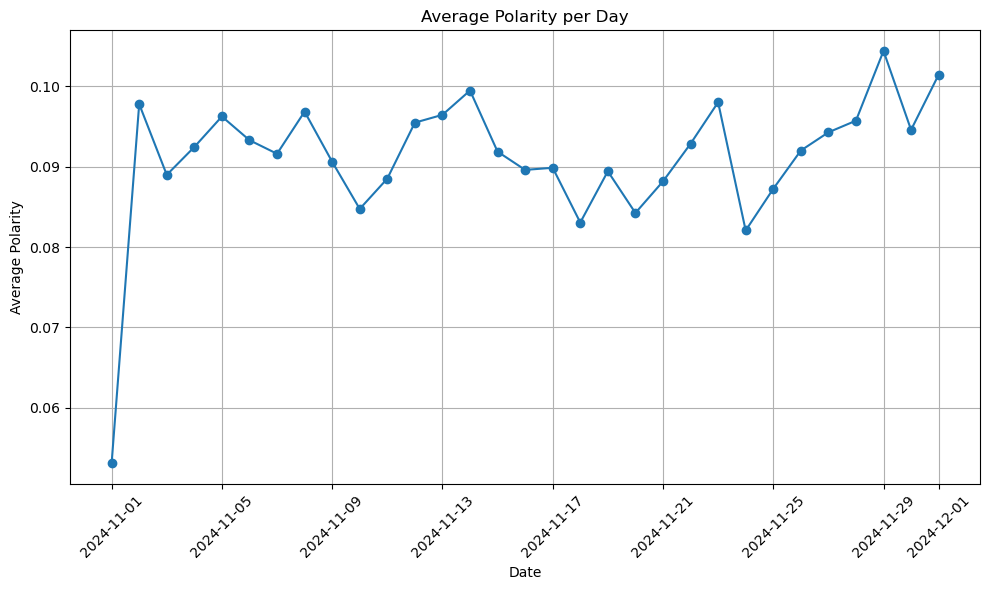

In [13]:
import pandas as pd
import matplotlib.pyplot as plt

newsapi_df = pd.read_csv('./news_api_download/articles-complete.csv.crdownload')
newsapi_df['publishedAt'] = pd.to_datetime(newsapi_df['publishedAt'], errors='coerce')
newsapi_df = newsapi_df.dropna(subset=['publishedAt'])
newsapi_df['date'] = newsapi_df['publishedAt'].dt.date

average_polarity_per_day = newsapi_df.groupby('date')['polarity'].mean()

plt.figure(figsize=(10, 6))
average_polarity_per_day.plot(kind='line', marker='o')
plt.title('Average Polarity per Day')
plt.xlabel('Date')
plt.ylabel('Average Polarity')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


C:\Users\Paolo Canigiula\AppData\Local\Temp\ipykernel_36312\4118373920.py:6: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  newsapi_df = pd.read_csv('./news_api_download/articles-complete.csv.crdownload')


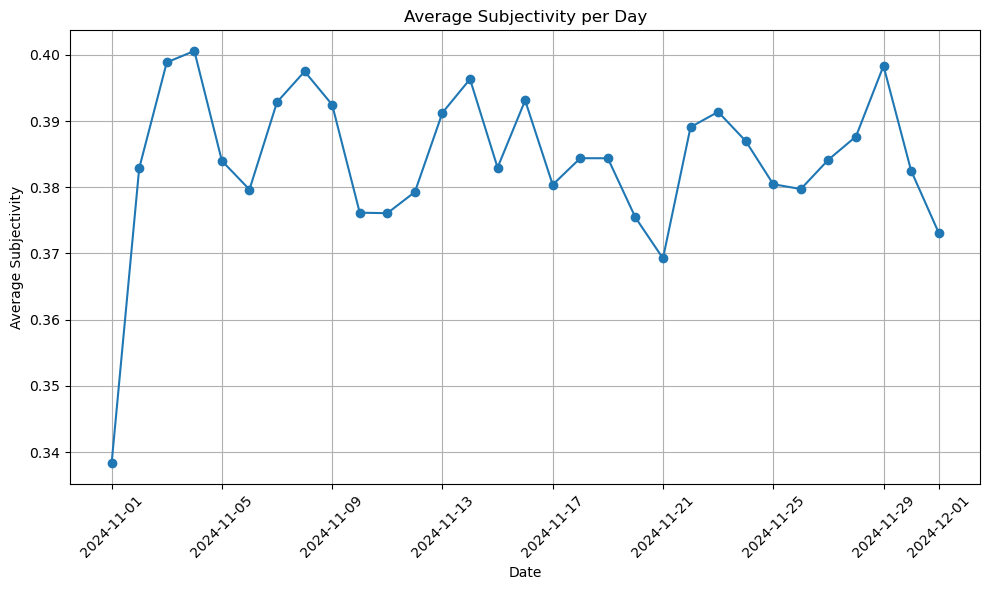

In [19]:
import pandas as pd
import matplotlib.pyplot as plt

newsapi_df = pd.read_csv('./news_api_download/articles-complete.csv.crdownload')
newsapi_df['publishedAt'] = pd.to_datetime(newsapi_df['publishedAt'], errors='coerce')
newsapi_df = newsapi_df.dropna(subset=['publishedAt'])
newsapi_df['subjectivity'] = pd.to_numeric(newsapi_df['subjectivity'], errors='coerce')
newsapi_df = newsapi_df.dropna(subset=['subjectivity'])
newsapi_df['date'] = newsapi_df['publishedAt'].dt.date

average_subjectivity_per_day = newsapi_df.groupby('date')['subjectivity'].mean()

plt.figure(figsize=(10, 6))
average_subjectivity_per_day.plot(kind='line', marker='o')
plt.title('Average Subjectivity per Day')
plt.xlabel('Date')
plt.ylabel('Average Subjectivity')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


Mean polarity for all articles on a range from [-1,1]: 0.09251653345109905
Mean subjectivity for all articles on a range from [0,1]: 0.3848497245843531


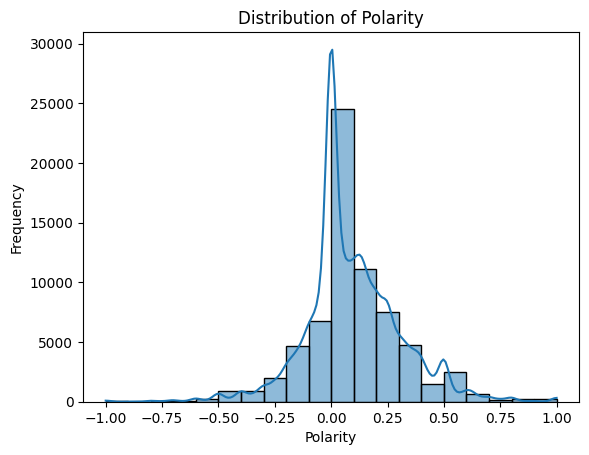

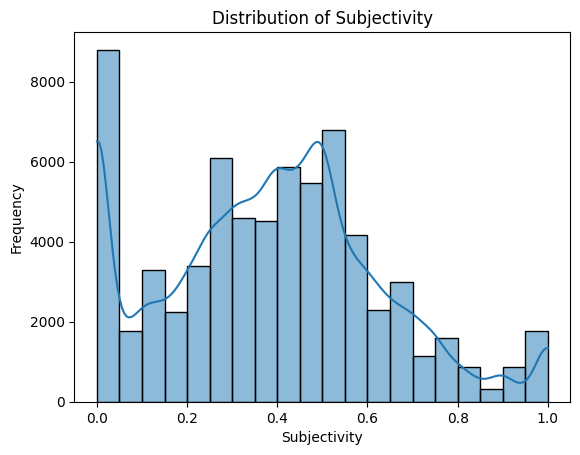

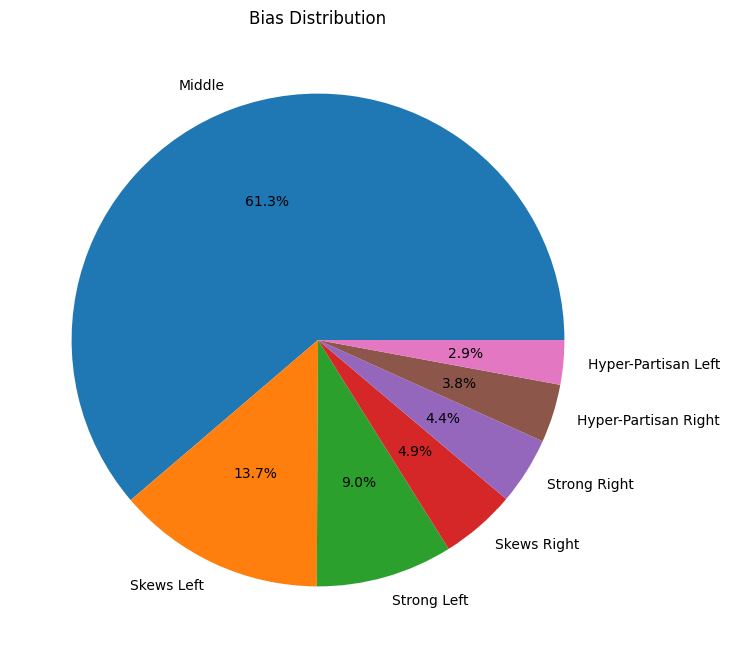

In [63]:
import seaborn as sns

newsapi_df = newsapi_df.dropna(subset=['subjectivity'])
print("Mean polarity for all articles on a range from [-1,1]: " + str(newsapi_df['polarity'].mean()))
print("Mean subjectivity for all articles on a range from [0,1]: " + str(newsapi_df['subjectivity'].mean()))

sns.histplot(newsapi_df['polarity'], bins=20, kde=True)
plt.title('Distribution of Polarity')
plt.xlabel('Polarity')
plt.ylabel('Frequency')
plt.show()

sns.histplot(newsapi_df['subjectivity'], bins=20, kde=True)
plt.title('Distribution of Subjectivity')
plt.xlabel('Subjectivity')
plt.ylabel('Frequency')
plt.show()

bias_distribution = newsapi_df['bias_label'].value_counts()
bias_distribution.plot(kind='pie', autopct='%1.1f%%', figsize=(8, 8))
plt.title('Bias Distribution')
plt.ylabel('')
plt.show()



In [45]:
election_df = pd.read_csv('./election_headlines.csv')
print(election_df.head())
print(election_df.columns)
print(election_df.dtypes)
election_df['publishedAt'] = pd.to_datetime(election_df['publishedAt'], errors='coerce')


   Unnamed: 0                                           Document  Topic  \
0           8  In Defense of ‘Resistance’ \n\nLast night, les...      0   
1          13  Can I vote in person instead of returning my m...      0   
2          14  Man arrested after double shooting in Stockton...      0   
3          15  Stockton police investigating after man, 46, a...      0   
4          28  Trump having dinner with Canadian Prime Minist...      0   

                             Name  \
0  0_trump_donald_trumps_election   
1  0_trump_donald_trumps_election   
2  0_trump_donald_trumps_election   
3  0_trump_donald_trumps_election   
4  0_trump_donald_trumps_election   

                                      Representation  Representative_Docs  \
0  ['trump', 'donald', 'trumps', 'election', 'pre...                  NaN   
1  ['trump', 'donald', 'trumps', 'election', 'pre...                  NaN   
2  ['trump', 'donald', 'trumps', 'election', 'pre...                  NaN   
3  ['trump', 'dona

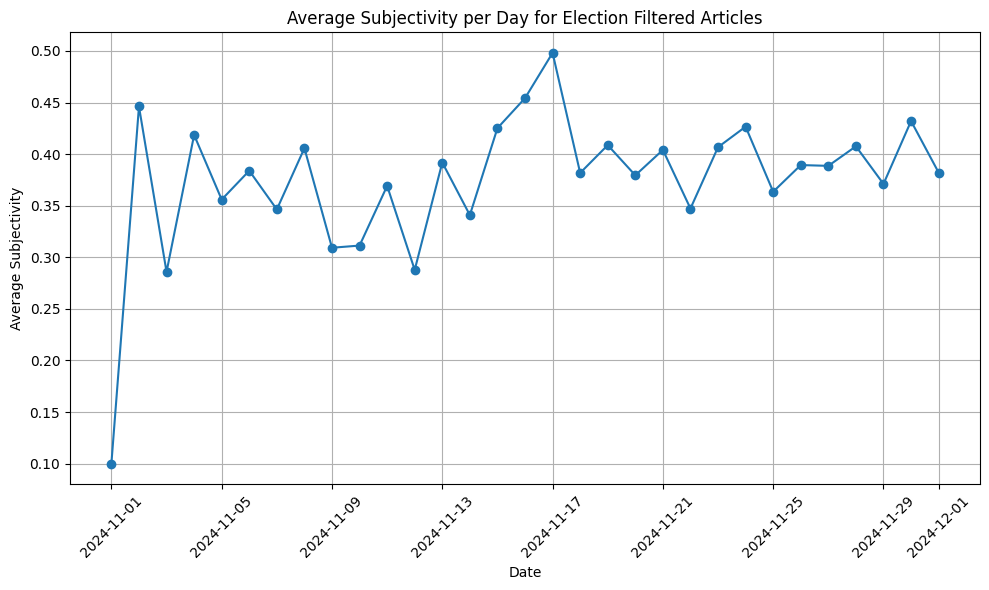

In [46]:
election_df['date'] = election_df['publishedAt'].dt.date

average_subjectivity_per_day = election_df.groupby('date')['subjectivity'].mean()

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
average_subjectivity_per_day.plot(kind='line', marker='o')
plt.title('Average Subjectivity per Day for Election Filtered Articles')
plt.xlabel('Date')
plt.ylabel('Average Subjectivity')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

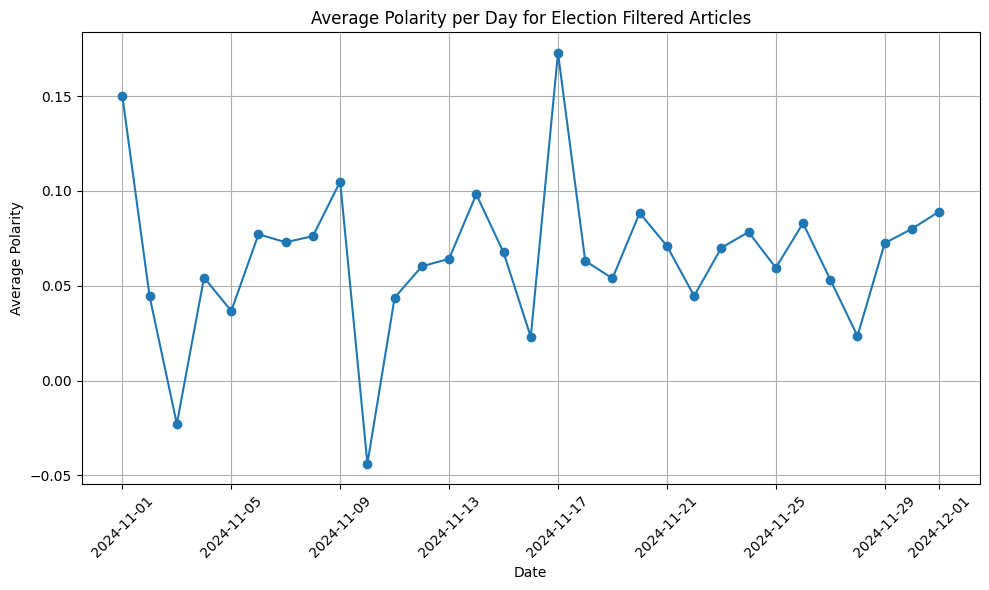

In [47]:
election_df['date'] = election_df['publishedAt'].dt.date

average_subjectivity_per_day = election_df.groupby('date')['polarity'].mean()

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
average_subjectivity_per_day.plot(kind='line', marker='o')
plt.title('Average Polarity per Day for Election Filtered Articles')
plt.xlabel('Date')
plt.ylabel('Average Polarity')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

['Left' 'Middle' nan 'Right']


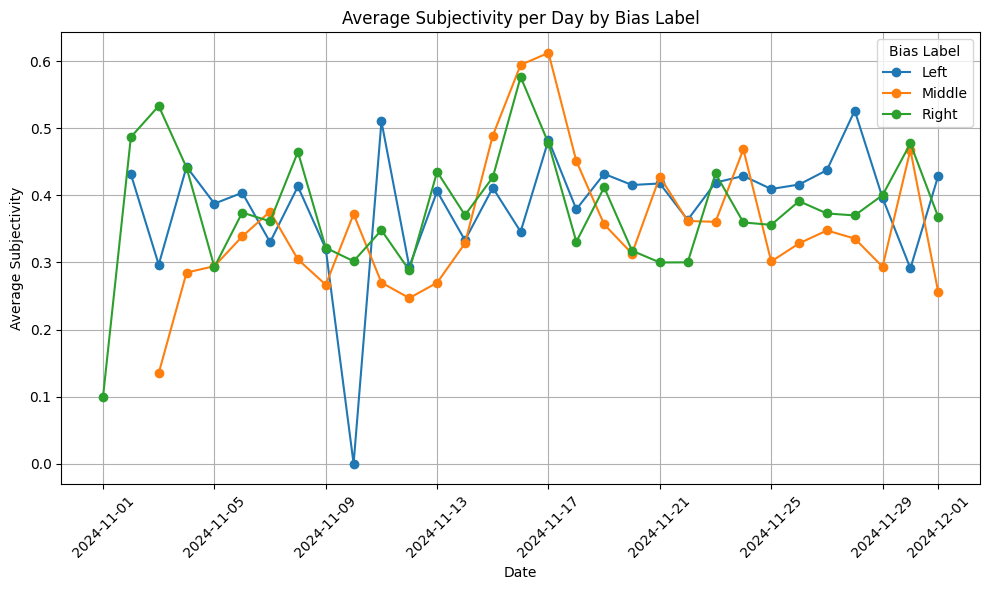

In [ ]:
bias_mapping = {
    'Skews Left': 'Left',
    'Strong Left': 'Left',
    'Hyper-Partisan Left': 'Left',
    'Skews Right': 'Right',
    'Strong Right': 'Right',
    'Hyper-Partisan Right': 'Right',
    'Middle': 'Middle'
}

election_df['bias_label'] = election_df['bias_label'].replace(bias_mapping)
print(election_df['bias_label'].unique())
average_subjectivity_per_group = election_df.groupby(['date', 'bias_label'])['subjectivity'].mean().reset_index()
pivot_data = average_subjectivity_per_group.pivot(index='date', columns='bias_label', values='subjectivity')

plt.figure(figsize=(10, 6))
for bias_label in pivot_data.columns:
    plt.plot(pivot_data.index, pivot_data[bias_label], marker='o', label=bias_label)

plt.title('Average Subjectivity per Day by Bias Label for Election Filtered Articles')
plt.xlabel('Date')
plt.ylabel('Average Subjectivity')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend(title='Bias Label')
plt.tight_layout()
plt.show()


['Left' 'Middle' nan 'Right']


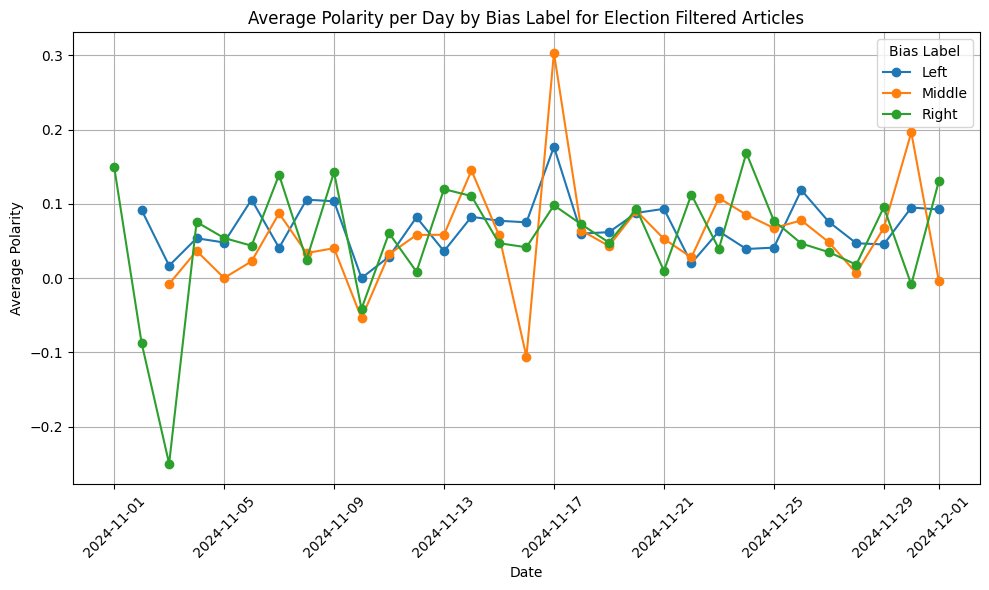

In [57]:
print(election_df['bias_label'].unique())
average_subjectivity_per_group = election_df.groupby(['date', 'bias_label'])['polarity'].mean().reset_index()
pivot_data = average_subjectivity_per_group.pivot(index='date', columns='bias_label', values='polarity')

plt.figure(figsize=(10, 6))
for bias_label in pivot_data.columns:
    plt.plot(pivot_data.index, pivot_data[bias_label], marker='o', label=bias_label)

plt.title('Average Polarity per Day by Bias Label for Election Filtered Articles')
plt.xlabel('Date')
plt.ylabel('Average Polarity')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend(title='Bias Label')
plt.tight_layout()
plt.show()
